In [17]:
import pandas as pd     

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report

In [18]:
df = pd.read_csv('ecommerce_purchase_data.csv')

## Analyzing the Data

In [19]:
df.describe()

,CustomerID,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,LoyaltyProgramMember,CustomerRating
count,2947.000000,2962.000000,2955.000000,2956.000000,2945.000000,2954.000000,2957.000000
mean,1500.295894,43.517556,69938.474788,254.474133,25.302547,0.506093,3.025023
std,866.181462,14.937307,29174.762995,143.610427,14.127879,0.500048,1.146625
min,1.000000,18.000000,20060.000000,5.310621,1.000000,0.000000,1.001010
25%,748.500000,31.000000,44760.000000,134.347252,13.000000,0.000000,2.037566
50%,1500.000000,43.500000,69589.000000,255.926920,25.000000,1.000000,3.060551
75%,2249.500000,56.000000,95905.000000,377.407216,38.000000,1.000000,4.000336
max,3000.000000,69.000000,119993.000000,499.925376,49.000000,1.000000,4.999699


In [20]:

df.head()

,CustomerID,Age,Gender,AnnualIncome,PurchaseAmount,PurchaseFrequency,LastPurchaseDate,ProductCategory,LoyaltyProgramMember,CustomerRating
0,1.0,56.0,Male,70225.0,125.635565,48.0,01-01-2023,Toys,0.0,1.210366
1,2.0,69.0,Male,57952.0,156.417933,NaN,02-01-2023,Books,0.0,3.201970
2,3.0,46.0,Other,57663.0,244.151650,39.0,03-01-2023,Toys,0.0,2.229175
3,4.0,32.0,Female,81381.0,36.275633,29.0,04-01-2023,Books,1.0,3.134410
4,5.0,60.0,Male,67929.0,307.515054,24.0,NaN,Clothing,1.0,1.537188


#### Dropping Unecessary Columns

In [21]:
df.drop(columns=['CustomerID'], inplace=True)

In [22]:
df.head()

,Age,Gender,AnnualIncome,PurchaseAmount,PurchaseFrequency,LastPurchaseDate,ProductCategory,LoyaltyProgramMember,CustomerRating
0,56.0,Male,70225.0,125.635565,48.0,01-01-2023,Toys,0.0,1.210366
1,69.0,Male,57952.0,156.417933,NaN,02-01-2023,Books,0.0,3.201970
2,46.0,Other,57663.0,244.151650,39.0,03-01-2023,Toys,0.0,2.229175
3,32.0,Female,81381.0,36.275633,29.0,04-01-2023,Books,1.0,3.134410
4,60.0,Male,67929.0,307.515054,24.0,NaN,Clothing,1.0,1.537188


In [23]:
df.isna().sum()

Age                     38
Gender                  36
AnnualIncome            45
PurchaseAmount          44
PurchaseFrequency       55
LastPurchaseDate        35
ProductCategory         51
LoyaltyProgramMember    46
CustomerRating          43
dtype: int64

### Seperating Categorical and Numerical Data

In [24]:
categorical_columns = ['Gender', 'ProductCategory','LastPurchaseDate']
numerical_columns = ['Age', 'AnnualIncome', 'PurchaseAmount','LoyaltyProgramMember','CustomerRating','PurchaseFrequency']

### Replacing Null and missing values as well as duplicates

In [25]:
df.drop_duplicates()

,Age,Gender,AnnualIncome,PurchaseAmount,PurchaseFrequency,LastPurchaseDate,ProductCategory,LoyaltyProgramMember,CustomerRating
0,56.0,Male,70225.0,125.635565,48.0,01-01-2023,Toys,0.0,1.210366
1,69.0,Male,57952.0,156.417933,NaN,02-01-2023,Books,0.0,3.201970
2,46.0,Other,57663.0,244.151650,39.0,03-01-2023,Toys,0.0,2.229175
3,32.0,Female,81381.0,36.275633,29.0,04-01-2023,Books,1.0,3.134410
4,60.0,Male,67929.0,307.515054,24.0,NaN,Clothing,1.0,1.537188
...,...,...,...,...,...,...,...,...,...
2995,38.0,Other,110283.0,312.042883,5.0,15-03-2031,Home,1.0,3.942962
2996,52.0,Female,92255.0,150.675418,37.0,16-03-2031,Toys,0.0,1.062000
2997,49.0,Male,101899.0,47.790648,31.0,17-03-2031,Books,1.0,4.519943
2998,47.0,Male,48718.0,380.917209,12.0,18-03-2031,Clothing,1.0,1.403219


Filling Categorical Null values with mode and numerical Null values with mean of that resprctive column.

In [26]:

for cols in categorical_columns:
    df[cols] = df[cols].fillna(df[cols].mode()[0])

for cols in numerical_columns:
    df[cols] = df[cols].fillna(df[cols].mean())


In [27]:
df.head()

,Age,Gender,AnnualIncome,PurchaseAmount,PurchaseFrequency,LastPurchaseDate,ProductCategory,LoyaltyProgramMember,CustomerRating
0,56.0,Male,70225.0,125.635565,48.000000,01-01-2023,Toys,0.0,1.210366
1,69.0,Male,57952.0,156.417933,25.302547,02-01-2023,Books,0.0,3.201970
2,46.0,Other,57663.0,244.151650,39.000000,03-01-2023,Toys,0.0,2.229175
3,32.0,Female,81381.0,36.275633,29.000000,04-01-2023,Books,1.0,3.134410
4,60.0,Male,67929.0,307.515054,24.000000,01-01-2023,Clothing,1.0,1.537188


In [28]:
onc = ['Gender', 'ProductCategory']

df = pd.get_dummies(df, columns=onc, drop_first=True)

In [29]:
df.head()

,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,LastPurchaseDate,LoyaltyProgramMember,CustomerRating,Gender_Male,Gender_Other,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home,ProductCategory_Toys
0,56.0,70225.0,125.635565,48.000000,01-01-2023,0.0,1.210366,True,False,False,False,False,True
1,69.0,57952.0,156.417933,25.302547,02-01-2023,0.0,3.201970,True,False,False,False,False,False
2,46.0,57663.0,244.151650,39.000000,03-01-2023,0.0,2.229175,False,True,False,False,False,True
3,32.0,81381.0,36.275633,29.000000,04-01-2023,1.0,3.134410,False,False,False,False,False,False
4,60.0,67929.0,307.515054,24.000000,01-01-2023,1.0,1.537188,True,False,True,False,False,False


## Implementing Isolation Forest

To  find out the outliers

In [30]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso_forest.fit_predict(df[numerical_columns])
df['outlier'] = outlier_pred
print(df['outlier'].value_counts())

outlier
 1    2850
-1     150
Name: count, dtype: int64


In [31]:
outliers = df[df['outlier'] == -1]
inliers = df[df['outlier'] == 1]


print("Outlier Summary Statistics:\n", outliers[numerical_columns].describe())

num_outliers = len(outliers)
total_customers = len(df)
outlier_percentage = (num_outliers / total_customers) * 100

print(f"\nNumber of outliers detected: {num_outliers} ({outlier_percentage:.2f}% of customers)")


Outlier Summary Statistics:
               Age   AnnualIncome  PurchaseAmount  LoyaltyProgramMember  \
count  150.000000     150.000000      150.000000            150.000000   
mean    41.146667   72044.966667      235.080466              0.437114   
std     21.187367   38077.764381      191.398738              0.478793   
min     18.000000   20287.000000        5.310621              0.000000   
25%     21.000000   32801.750000       35.645527              0.000000   
50%     31.500000   78442.500000      213.829734              0.000000   
75%     65.000000  111223.500000      434.318449              1.000000   
max     69.000000  119809.000000      499.925376              1.000000   

       CustomerRating  PurchaseFrequency  
count      150.000000         150.000000  
mean         2.687228          26.848684  
std          1.491003          18.896832  
min          1.001010           1.000000  
25%          1.276742           6.000000  
50%          2.192808          29.000000  
75%

## Business Impact:
- Outliers may represent customers with unusual purchase behavior (e.g., very high/low spending, frequency, or ratings).
- These could be high-value customers, fraudulent activities, or data entry errors.
- Understanding these outliers can help refine marketing strategies, improve fraud detection, and enhance data quality.

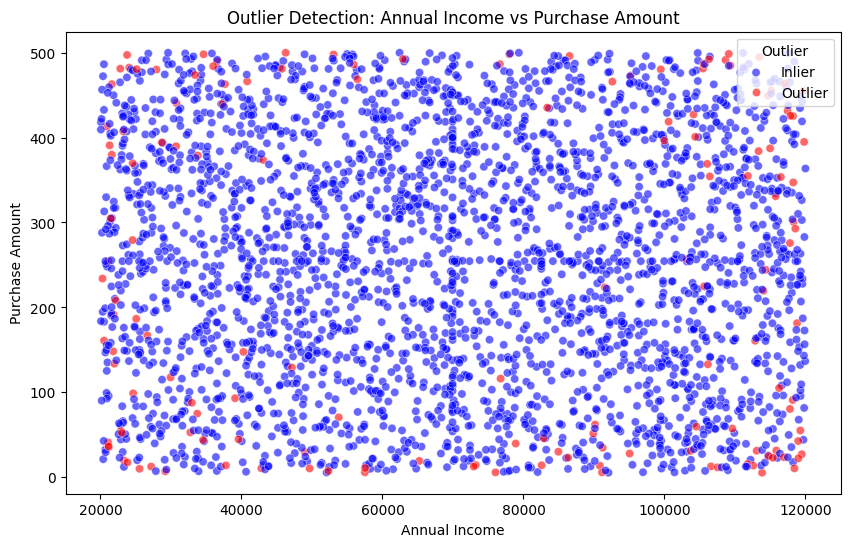

In [32]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='AnnualIncome',
    y='PurchaseAmount',
    hue='outlier',
    palette={1: 'blue', -1: 'red'},
    alpha=0.6
)
plt.title('Outlier Detection: Annual Income vs Purchase Amount')
plt.xlabel('Annual Income')
plt.ylabel('Purchase Amount')
plt.legend(title='Outlier', labels=['Inlier', 'Outlier'])
plt.show()


In [4]:
num = 2
count = 2
n =100
for _ in range(n):
    if count < n:
        print(count,end=' ')
        num = num + count
        count = count + 2

2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96 98 